<a href="https://colab.research.google.com/github/clementcisterne/Formation/blob/master/projet_reseaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet - Analyse de réseaux

Le but de ce tp est d'appliquer les méthodes d'analyse de réseaux vu en cours. Le jeu de données est un échantillon de 100 millions de connexions (une arête entre i et j indique j follow i) sur le réseau social Twitter. Il s'agit de l'extrait d'un snapshot effectué en 2010. 

### Descritpion des colonnes :
- **dest** : le node_id destination
- **source**: le node_id source

Par exemple : si on a 'dest' = A et 'source' = B, alors il y a une connexion de A vers B 

Le fichier twitter-2010-ids.csv liste les identifiants twitter correspondants aux identifiants utilisés dans le jeu de données. Si le compte est public et existe toujours, alors vous pourrez y accéder sur Twitter. Cela permettra éventuellement de valider certaines de vos hypothèses post-analyse.

In [0]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
import os
import warnings
warnings.filterwarnings("ignore")

### Data import

On récupère les échantillons : 1M de noeud chacun

In [0]:
sub1 = pd.read_csv(
        'sub_1M_1.csv',
        header=0,
        names=['dest', 'source'],
        sep=' ',
        low_memory=False,
        #dtype={'dest': np.int64, 'source': np.int64},
        #nrows=args.nb_rows
    )

In [0]:
sub1 = sub1[1:]

In [0]:
sub1.head()

,dest,source
1,1,0
2,3,2
3,2,3
4,5,4
5,4,5


### Graph vizaulisation

In [0]:
def plot_graph(G):
    nx.draw_networkx(G, pos=nx.circular_layout(G))
    plt.axis('off')
    plt.figure(figsize=(50,50))
    plt.show()
    
def consctruct_graph(G, sub):
    for edge in sub.values:
        G.add_edge()


In [0]:
G = nx.Graph()
edges = tuple(map(tuple, sub1.values))
G.add_edges_from(edges)

In [0]:
#plot_graph(G)

### Degré maximum

In [0]:
def max_degree(G):
    from operator import itemgetter 
    print(max(G.degree(), key=itemgetter(1)))
    degrees = [i[1] for i in G.degree()]
    #size = [d*10 for d in degrees]
    print(max(degrees))
    plt.hist(degrees, bins=50)
    plt.show()
    #nx.draw_networkx(G, pos=nx.circular_layout(G), node_color=degrees, node_size=size)
    #plt.show()

('106186', 2186)
2186


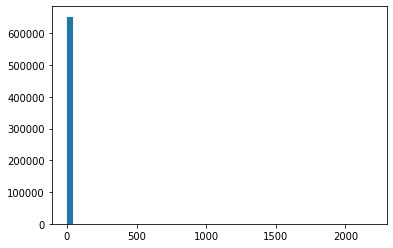

In [0]:
max_degree(G)

### Analyse composantes connexes

In [0]:
def connected_components(G):
    c = [ len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True) ]
    cc = [ c for c in sorted(nx.connected_components(G), key=len, reverse=True) ]
    print(c)
    return cc


In [0]:
cc = connected_components(G)
G2 = nx.classes.function.induced_subgraph(G, cc[0])

[607716, 108, 107, 101, 92, 92, 83, 79, 65, 50, 45, 44, 42, 41, 40, 38, 37, 35, 35, 35, 34, 34, 34, 34, 34, 33, 32, 31, 31, 31, 31, 30, 30, 30, 29, 27, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 

In [0]:
start_time=time.time()

print(nx.average_shortest_path_length(G2))

interval = time.time() - start_time  
print('Temps total : '+str(interval))

## Id twitter

In [0]:
twit_id = pd.read_csv(
        'twitter-2010-ids.csv',
        header=0,
        #names=['dest', 'source'],
        sep=',',
        #low_memory=False,
        #dtype={'dest': np.int64, 'source': np.int64},
        #nrows=args.nb_rows
    )

In [0]:
node_id = [1005, 2075, 4728, 16095, 2075, 106186]

In [0]:
twit_id.loc[node_id]

,node_id,twitter_id
1005,1005,19854174
2075,2075,14932102
4728,4728,8819072
16095,16095,15893416
2075,2075,14932102
106186,106186,57383041
